In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')
# Top 5 rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.shape

(30000, 25)

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# Check the percentage distribution of each class 
data['default.payment.next.month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

In [6]:
data.isna().sum().sum()

0

In [7]:
# Defining the features
X = data.iloc[:,1:-1].values # input features
y = data.iloc[:,-1].values # output feature

we will use MinMaxScaling before PCA implementation

In [8]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [9]:
print(X)

[[0.01010101 1.         0.33333333 ... 0.         0.         0.        ]
 [0.11111111 1.         0.33333333 ... 0.00161031 0.         0.00378311]
 [0.08080808 1.         0.33333333 ... 0.00161031 0.00234451 0.00945777]
 ...
 [0.02020202 0.         0.33333333 ... 0.00676329 0.00468901 0.00586382]
 [0.07070707 0.         0.5        ... 0.00310145 0.12417444 0.00341236]
 [0.04040404 0.         0.33333333 ... 0.00161031 0.00234451 0.00189155]]


In [10]:
# Fitting PCA to analyze components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

In [11]:
# features sorted based on eigenvalues
pca.explained_variance_  

array([2.39921405e-01, 6.23298672e-02, 4.07593979e-02, 2.39375742e-02,
       1.66483704e-02, 1.42113781e-02, 9.28602578e-03, 7.87094875e-03,
       5.45234314e-03, 3.63128812e-03, 2.69052558e-03, 1.81099941e-03,
       1.34499878e-03, 1.09886467e-03, 1.00061702e-03, 5.97020005e-04,
       4.31000732e-04, 3.43514409e-04, 2.39650560e-04, 1.43196025e-04,
       1.08669361e-04, 7.41323540e-05, 3.79534566e-05])

finding the percentage of the importance of each feature

In [12]:
# Percentage contribution of each feature
pca.explained_variance_ratio_

array([5.52852843e-01, 1.43627219e-01, 9.39222117e-02, 5.51595468e-02,
       3.83629752e-02, 3.27473940e-02, 2.13978647e-02, 1.81370912e-02,
       1.25638786e-02, 8.36760671e-03, 6.19979995e-03, 4.17310065e-03,
       3.09929161e-03, 2.53212278e-03, 2.30572994e-03, 1.37571805e-03,
       9.93158489e-04, 7.91563044e-04, 5.52228734e-04, 3.29967764e-04,
       2.50407693e-04, 1.70823786e-04, 8.74564585e-05])

From the above variance outcome, we can extract the most optimal features set, below we are plotting the scree plot between the total features and cumulative sum of variance ratio.

Text(0.5, 1.0, 'Scree plot')

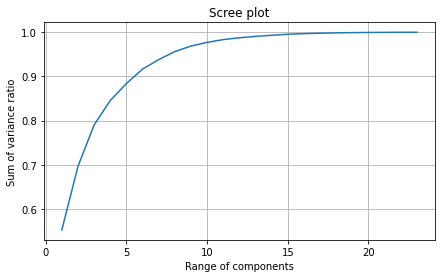

In [13]:
# Variance Vs Component plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,24,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

here 11 is the range where variance has a dip of sorts. That can be used as our n_components hyperparameter 

In [14]:
# Choosing the optimal component to be 11 as per the plot. 11 components are addressing 98% of the variance
pca = PCA(n_components=11)
pca.fit(X)

PCA(n_components=11)

In [15]:
pca.explained_variance_ratio_.cumsum()


array([0.55285284, 0.69648006, 0.79040227, 0.84556182, 0.8839248 ,
       0.91667219, 0.93807005, 0.95620715, 0.96877102, 0.97713863,
       0.98333843])

now that we've got the features we need, time to start data splitting and modelling accordingly

In [16]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(pca.transform(X),y,random_state=0, test_size = 0.2) 
# Creating the training and test sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24000, 11), (24000,), (6000, 11), (6000,))

balancing using SMOTE(dk why its used yet)

In [17]:
# Counting the labels before resampling
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

Before SMOTE, counts of label '1': 5339
Before SMOTE, counts of label '0': 18661 



balancing the classes

In [18]:
# Using SMOTE resampling for balancing the class labels
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=5, random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

print('After SMOTE, the shape of train_X: {}'.format(x_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res == 0)))

After SMOTE, the shape of train_X: (37322, 11)
After SMOTE, the shape of train_y: (37322,) 

After SMOTE, counts of label '1': 18661
After SMOTE, counts of label '0': 18661


defining a model

In [19]:
# Defining the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

training set model

In [20]:
# Training the logistic regression model
model.fit(x_train_res, y_train_res)
# Making predictions with the trained model
y_pred = model.predict(x_test)

determining how good the model is

In [21]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3320, 1383],
       [ 471,  826]])

In [22]:
# Test accuracy
model.score(x_test,y_test)

0.691

Using classification report

In [23]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4703
           1       0.37      0.64      0.47      1297

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

